# UK Weather & Climate (1836-2023)

What can be learned by looking at observational data aggregated over a monthly period throughout different regions of the UK since 1836. Firstly, is it possible to recognise any long term patterns and changes attributable to the changing climate, whilst taking into account other global effects? Then is it possible to see any differences regionally within the UK-wide changes that may be observed?

Only rainfall data goes all the way back to 1836, with temperatures back to 1885 and frost measurements only back to 1960 so not all can be investigated over the complete period but it is expected that all observations will have long enough
to show some changes of interest.


## Data Source: 

Met Office regional climate series: https://www.metoffice.gov.uk/research/climate/maps-and-data/uk-and-regional-series

## Grab all the files:

In [1]:
# Import the usual suspects for data manipulation, statistics, and visualisations.
import pandas as pd # used to "tidy" up and manipulate our data
import numpy as np # used for matrix and numerical calculations; foundation of pandas
from scipy import stats # contains stats functions and is used to visualise probability distributions
import matplotlib.pyplot as plt # used for visualisations
import seaborn as sns # a more user-friendly library used for visualisations
from bokeh.plotting import figure, output_notebook, show, save
from bokeh.models import ColumnDataSource, HoverTool, GroupFilter, CDSView
import pandas_bokeh
from bokeh.io import push_notebook, show, output_notebook, save, output_file
from bokeh.layouts import row 
from bokeh.transform import factor_cmap
from bokeh.models.layouts import TabPanel, Tabs
import warnings

output_notebook()

warnings.filterwarnings('ignore')


Loading BokehJS ...

In [2]:
w = {}
w['frost'] = pd.read_csv('data/weather/wal_frost.csv')
w['max'] = pd.read_csv('data/weather/wal_max.csv')
w['mean'] = pd.read_csv('data/weather/wal_mean.csv')
w['min'] = pd.read_csv('data/weather/wal_min.csv')
w['rain'] = pd.read_csv('data/weather/wal_rain.csv')
w['raindays'] = pd.read_csv('data/weather/wal_raindays.csv')
w['sun'] = pd.read_csv('data/weather/wal_sun.csv')
e={}
e['frost'] = pd.read_csv('data/weather/eng_frost.csv').drop(['win','spr','sum','aut','ann'], axis=1)
e['max'] = pd.read_csv('data/weather/eng_max.csv').drop(['win','spr','sum','aut','ann'], axis=1)
e['mean'] = pd.read_csv('data/weather/eng_meantemp.csv').drop(['win','spr','sum','aut','ann'], axis=1)
e['min'] = pd.read_csv('data/weather/eng_min.csv').drop(['win','spr','sum','aut','ann'], axis=1)
e['rain'] = pd.read_csv('data/weather/eng_rain.csv').drop(['win','spr','sum','aut','ann'], axis=1) #EARLIEST
e['raindays'] = pd.read_csv('data/weather/eng_rain1.csv').drop(['win','spr','sum','aut','ann'], axis=1)
e['sun'] = pd.read_csv('data/weather/eng_sun.csv').drop(['win','spr','sum','aut','ann'], axis=1)
s={}
s['frost'] = pd.read_csv('data/weather/sco_frost.csv')
s['max'] = pd.read_csv('data/weather/sco_max.csv')
s['mean'] = pd.read_csv('data/weather/sco_mean.csv')
s['min'] = pd.read_csv('data/weather/sco_min.csv')
s['rain'] = pd.read_csv('data/weather/sco_rain.csv')
s['raindays'] = pd.read_csv('data/weather/sco_raindays.csv')
s['sun'] = pd.read_csv('data/weather/sco_sun.csv')
n={}
n['frost'] = pd.read_csv('data/weather/ni_frost.csv')
n['max'] = pd.read_csv('data/weather/ni_max.csv')
n['mean'] = pd.read_csv('data/weather/ni_mean.csv')
n['min'] = pd.read_csv('data/weather/ni_min.csv')
n['rain'] = pd.read_csv('data/weather/ni_rain.csv')
n['raindays'] = pd.read_csv('data/weather/ni_raindays.csv')
n['sun'] = pd.read_csv('data/weather/ni_sun.csv')
u={}
u['frost'] = pd.read_csv('data/weather/uk_frost.csv').drop(['win','spr','sum','aut','ann'], axis=1)
u['max'] = pd.read_csv('data/weather/uk_max.csv').drop(['win','spr','sum','aut','ann'], axis=1)
u['mean'] = pd.read_csv('data/weather/uk_mean.csv').drop(['win','spr','sum','aut','ann'], axis=1)
u['min'] = pd.read_csv('data/weather/uk_min.csv').drop(['win','spr','sum','aut','ann'], axis=1)
u['rain'] = pd.read_csv('data/weather/uk_rain.csv').drop(['win','spr','sum','aut','ann'], axis=1)
u['raindays'] = pd.read_csv('data/weather/uk_raindays.csv').drop(['win','spr','sum','aut','ann'], axis=1)
u['sun'] = pd.read_csv('data/weather/uk_sun.csv').drop(['win','spr','sum','aut','ann'], axis=1)



observables = ['frost','max','mean','min','raindays','sun']

### Restructuring and organising the data

In [3]:
#Set initial empty dictionary and use 'rain' as the basis for each 
#country dictionary as it starts with the earliest values

mlt = {}
eng = e['rain'].melt(id_vars=['year'], var_name='month', value_name='rain')

#Loop over each variable to create full dataframes for each country, 
#Melting each original file into a suitable shape and adding it on 
#to the previous columns

for obs in observables:
    mlt[obs] = e[obs].melt(id_vars=['year'], var_name='month', value_name=obs)
    eng = pd.merge(eng, mlt[obs] ,  how='outer', left_on=['year','month'], right_on = ['year','month'])
    
#Add a label column for later on when making one big dataframe    
eng['country'] = 'England'


In [4]:
mlt = {}
wal = w['rain'].melt(id_vars=['year'], var_name='month', value_name='rain')

for obs in observables:
    mlt[obs] = w[obs].melt(id_vars=['year'], var_name='month', value_name=obs)
    wal = pd.merge(wal, mlt[obs] ,  how='outer', left_on=['year','month'], right_on = ['year','month'])
wal['country'] = 'Wales'


In [5]:
mlt = {}
sco = s['rain'].melt(id_vars=['year'], var_name='month', value_name='rain')

for obs in observables:
    mlt[obs] = s[obs].melt(id_vars=['year'], var_name='month', value_name=obs)
    sco = pd.merge(sco, mlt[obs] ,  how='outer', left_on=['year','month'], right_on = ['year','month'])
sco['country'] = 'Scotland'


In [6]:
mlt = {}
ni = n['rain'].melt(id_vars=['year'], var_name='month', value_name='rain')

for obs in observables:
    mlt[obs] = n[obs].melt(id_vars=['year'], var_name='month', value_name=obs)
    ni = pd.merge(ni, mlt[obs] ,  how='outer', left_on=['year','month'], right_on = ['year','month'])
ni['country'] = 'NI'


In [7]:
mlt = {}
uk = u['rain'].melt(id_vars=['year'], var_name='month', value_name='rain')

for obs in observables:
    mlt[obs] = u[obs].melt(id_vars=['year'], var_name='month', value_name=obs)
    uk = pd.merge(uk, mlt[obs] ,  how='outer', left_on=['year','month'], right_on = ['year','month'])
uk['country'] = 'UK'


In [8]:
# Now change the months to numeric versions:

In [9]:
datemap = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9,'oct':10,'nov':11,'dec':12}
eng['month'] = eng.month.map(datemap)
sco['month'] = sco.month.map(datemap)
wal['month'] = wal.month.map(datemap)
ni['month'] = ni.month.map(datemap)
uk['month'] = uk.month.map(datemap)

In [10]:
# Set up a dataframe with the UK averages.
# Add a date column to organise better.

uk['date'] = pd.to_datetime(dict(year=uk.year, month=uk.month, day=28))
uk.sort_values(by='date', inplace = True) 
uk = uk.reset_index().drop(['index'], axis=1)
uk.head(1)

year  month   rain  frost  max  mean  min  raindays  sun country       date
0  1836      1  101.5    NaN  NaN   NaN  NaN       NaN  NaN      UK 1836-01-28

In [11]:
# Set up a dataframe with all the regions plus the UK averages.

ukall = pd.concat([eng,sco,wal,ni,uk])#.reset_index()
ukall['date'] = pd.to_datetime(dict(year=ukall.year, month=ukall.month, day=28))
ukall.sort_values(by='date', inplace = True) 
ukall = ukall.reset_index().drop(['index'], axis=1)
ukall.head(1)

year  month  rain  frost  max  mean  min  raindays  sun  country       date
0  1836      1  65.1    NaN  NaN   NaN  NaN       NaN  NaN  England 1836-01-28

In [12]:
# Set up a dataframe with just the regions Eng, Sco, Wal, NI.

ukc = pd.concat([eng,sco,wal,ni])#.reset_index()
ukc['date'] = pd.to_datetime(dict(year=ukc.year, month=ukc.month, day=28))
ukc.sort_values(by='date', inplace = True) 
ukc = ukc.reset_index().drop(['index'], axis=1)
ukc.head(1)

year  month  rain  frost  max  mean  min  raindays  sun  country       date
0  1836      1  65.1    NaN  NaN   NaN  NaN       NaN  NaN  England 1836-01-28

In [13]:
ukall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11280 entries, 0 to 11279
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   year      11280 non-null  int64         
 1   month     11280 non-null  int64         
 2   rain      11280 non-null  float64       
 3   frost     3840 non-null   float64       
 4   max       8400 non-null   float64       
 5   mean      8400 non-null   float64       
 6   min       8400 non-null   float64       
 7   raindays  7980 non-null   float64       
 8   sun       6840 non-null   float64       
 9   country   11280 non-null  object        
 10  date      11280 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(7), int64(2), object(1)
memory usage: 969.5+ KB


## Regional observations each year:

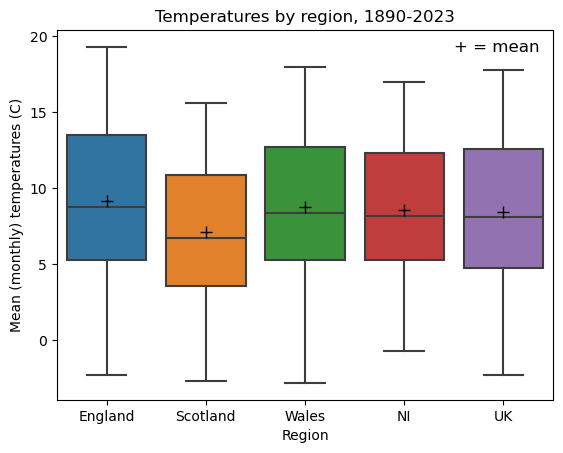

In [14]:
sns.boxplot(x='country',y='mean', data = ukall, showmeans=True,
            meanprops={'marker':'+',
                       'markerfacecolor':'white', 
                       'markeredgecolor':'black','markersize':'8'},order=['England', 'Scotland', 'Wales','NI','UK'])
plt.ylabel('Mean (monthly) temperatures (C)')
plt.xlabel('Region')
plt.title('Temperatures by region, 1890-2023')
plt.text(3.5,19,'+ = mean',size='12');

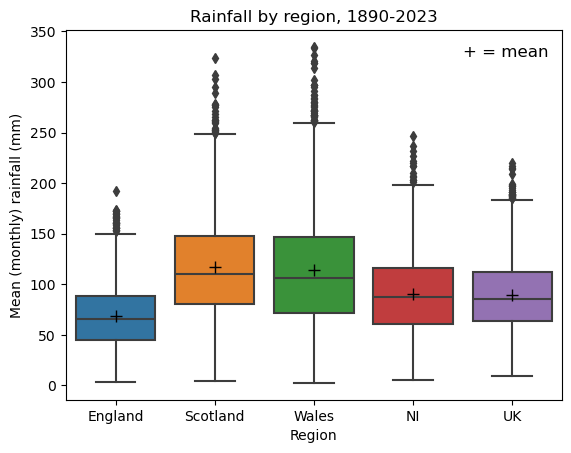

In [15]:
sns.boxplot(x='country',y='rain', data = ukall, showmeans=True,
            meanprops={'marker':'+',
                       'markerfacecolor':'white', 
                       'markeredgecolor':'black','markersize':'8'},order=['England', 'Scotland', 'Wales','NI','UK'])
plt.ylabel('Mean (monthly) rainfall (mm)')
plt.xlabel('Region')
plt.title('Rainfall by region, 1890-2023')
plt.text(3.5,325,'+ = mean',size='12');

## Have different parts of the UK wamed at different rates since 1890?

In [16]:
#What about mean annual temperature each month (groupby year), for the last 150 years, hue = country

In [17]:
#There's quite a big gap in the data before 1890 so lets start there...
tempmask = ukc['max'].notnull()
uk1890 = ukc[tempmask]         

In [18]:
uktemps = uk1890[['year','month','mean','country','date']].copy()
uktemps.head()

year  month  mean   country       date
2304  1884      1   5.8     Wales 1884-01-28
2305  1884      1   5.7   England 1884-01-28
2306  1884      1   3.5  Scotland 1884-01-28
2307  1884      1   5.6        NI 1884-01-28
2308  1884      2   3.0  Scotland 1884-02-28

In [19]:
annualmean = uktemps.groupby(by=['year','country']).mean()
annualmean

month       mean                date
year country                                       
1884 England     6.5   9.258333 1884-07-13 08:00:00
     NI          6.5   8.675000 1884-07-13 08:00:00
     Scotland    6.5   7.041667 1884-07-13 08:00:00
     Wales       6.5   8.691667 1884-07-13 08:00:00
1885 England     6.5   8.100000 1885-07-13 12:00:00
...              ...        ...                 ...
2022 Wales       6.5  10.200000 2022-07-13 12:00:00
2023 England     6.5  10.875000 2023-07-13 12:00:00
     NI          6.5  10.166667 2023-07-13 12:00:00
     Scotland    6.5   8.266667 2023-07-13 12:00:00
     Wales       6.5  10.391667 2023-07-13 12:00:00

[560 rows x 3 columns]

In [20]:
#Put the indices back as columns for plotting...
annualmean = annualmean.reset_index()
annualmean = annualmean.rename(columns={"country": "Region"})
annualmean

year    Region  month       mean                date
0    1884   England    6.5   9.258333 1884-07-13 08:00:00
1    1884        NI    6.5   8.675000 1884-07-13 08:00:00
2    1884  Scotland    6.5   7.041667 1884-07-13 08:00:00
3    1884     Wales    6.5   8.691667 1884-07-13 08:00:00
4    1885   England    6.5   8.100000 1885-07-13 12:00:00
..    ...       ...    ...        ...                 ...
555  2022     Wales    6.5  10.200000 2022-07-13 12:00:00
556  2023   England    6.5  10.875000 2023-07-13 12:00:00
557  2023        NI    6.5  10.166667 2023-07-13 12:00:00
558  2023  Scotland    6.5   8.266667 2023-07-13 12:00:00
559  2023     Wales    6.5  10.391667 2023-07-13 12:00:00

[560 rows x 5 columns]

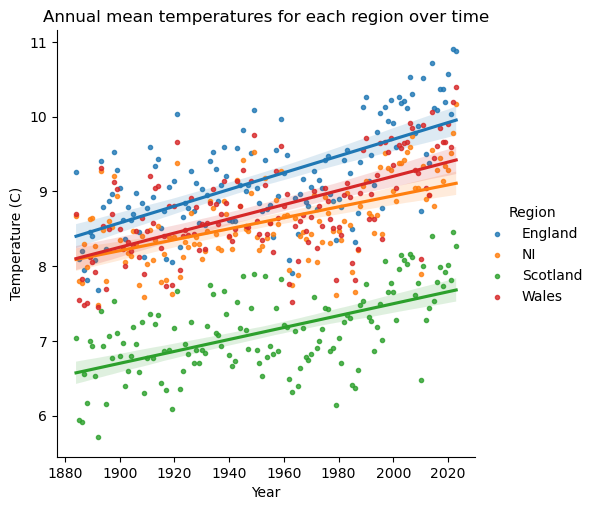

In [21]:
anmeanplt = sns.lmplot(x = 'year', y = 'mean', hue = "Region", data = annualmean, markers = '.')
plt.xlabel('Year')
plt.ylabel('Temperature (C)')
plt.title('Annual mean temperatures for each region over time');


## Does El Nino correspond to drier UK winters?

In principle, El Nino in the Pacific Ocean can affect the weather in Europe due to influencing the strength of the jet stream - specifically giving Northern Europe drier winters the following year. The UK is borderline northern, so can we see anything in this data to suggest this?

Whilst no definitive definition of El Nino years, the following list corresponds to the strongest such years since 1890.
From https://psl.noaa.gov/enso/climaterisks/years/top24enso.html

In [22]:
elnino = [1997,1982,1972,1930,1965,1902,1991,1941,1925,1987,1896,1957,2009,2006,1918,2002,1914,1905,1940,1977,1899,1963]

In [23]:
# We only want the late winter months,so picked out Jan-Mar each year.
# Then sum over the rainfall to get a total amount in those months per year.

wintermonths = uk[uk['month'].isin([1, 2, 3])]
winterrain = wintermonths[['rain','year','month']].groupby(by=['year','month']).mean()
winterrain_tot = winterrain.groupby(by='year').sum()

# reset the column. 
winterrain_tot['year'] = winterrain_tot.index

(80.0, 520.0)

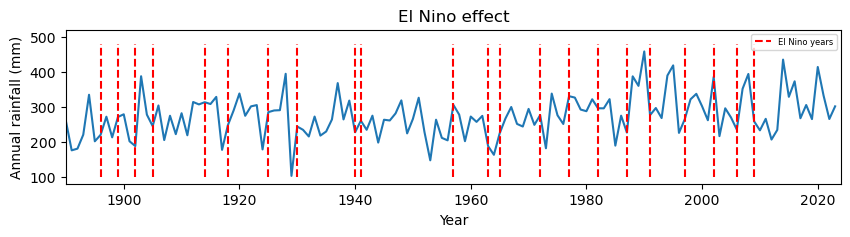

In [24]:
plt.figure(figsize = (10,2))
rain_elnino_plt = sns.lineplot(x = 'year', y = 'rain', data = winterrain_tot)         
rain_elnino_plt.vlines(x = elnino, ymin = 100, ymax = 480, color='red',linestyle = '--',label = 'El Nino years') 
rain_elnino_plt.set_xlim(1890,2024)
plt.legend(loc = 'best',facecolor='white', prop={'size': 6})
plt.title('El Nino effect')
plt.ylabel('Annual rainfall (mm)')
plt.xlabel('Year')
plt.ylim(80,520)



If we want, can see the top 10 years by uncommenting the following 2 cells (although, they don't show much of interest):


In [25]:
years = winterrain_tot.sort_values(by='rain')[['year']].head(10)
#years

In [26]:
#elnino;

## Simple plot of average uk temperatures by month

In [27]:
uk2 = uk[uk['max'].notnull()].drop('country',axis=1)[['max','mean','min','month','year']]
#uk2

Text(0.5, 1.0, 'Mean Monthly temperatures compared to day length/seasons')

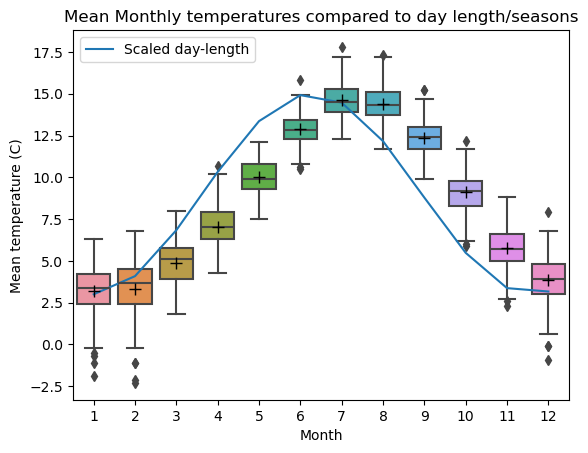

In [28]:
ax = sns.boxplot(x='month',y='mean', data = uk2, showmeans=True,
            meanprops={'marker':'+',
                       'markerfacecolor':'white', 
                       'markeredgecolor':'black','markersize':'8'})
sindata = np.linspace(0,6.5, 12, endpoint=True)
ax2 = plt.plot(np.sin((sindata-1.55))*6+9,label = 'Scaled day-length')
plt.xlabel('Month')
plt.ylabel('Mean temperature (C)')
plt.legend(loc = 'upper left')
x=uk2['month']
plt.title('Mean Monthly temperatures compared to day length/seasons')

## Raindays - when it rains, has the intensity increased?


By dividing the total amount of rain by the number of days it rains, we can see how much it rains on the days it does - if the intensity has increased.


In [29]:
ukraindays = ukc[ukc['raindays'].notnull()][['year','month','raindays','rain','country']]
ukraindays['intensity'] = ukraindays['rain']/ukraindays['raindays']

In [30]:
ukraindays.describe()

year        month     raindays         rain    intensity
count  6384.000000  6384.000000  6384.000000  6384.000000  6384.000000
mean   1957.000000     6.500000    14.320410    99.417528     6.687745
std      38.395715     3.452323     4.987603    51.155411     1.759547
min    1891.000000     1.000000     0.600000     2.400000     2.528302
25%    1924.000000     3.750000    10.700000    62.200000     5.435794
50%    1957.000000     6.500000    14.300000    91.300000     6.446441
75%    1990.000000     9.250000    18.000000   128.700000     7.673249
max    2023.000000    12.000000    29.000000   334.700000    14.229008

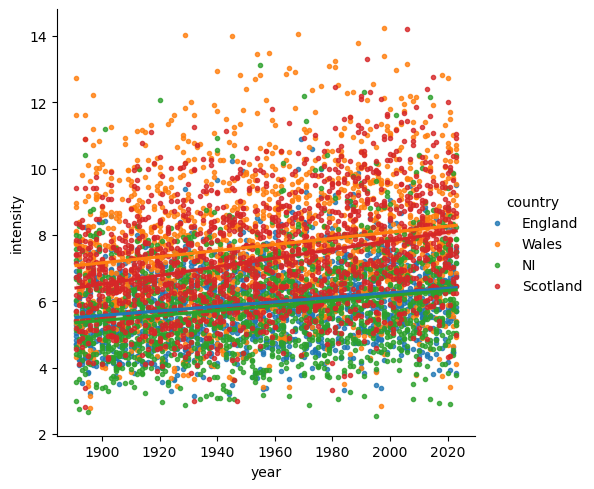

In [31]:
sns.lmplot(data=ukraindays, x='year',y='intensity', hue='country',markers='.');

Whilst there is a bit too much going on in this plot, we can see that when it rains, it rains more in Scotland and Wales than England and NI. The amount of rain per wet day is increasing in all regions though, most quickly in Scotland. 


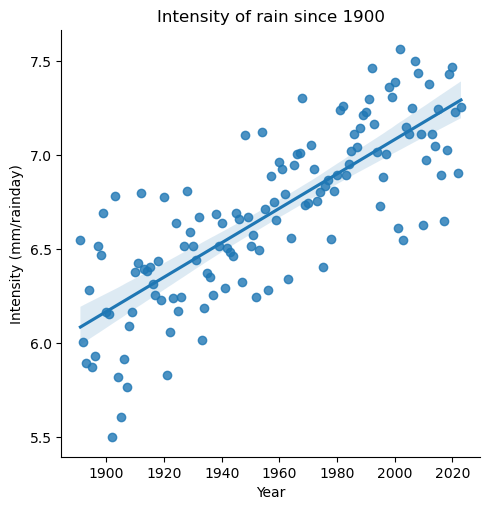

In [32]:
meanukraindays = ukraindays.drop('country',axis=1).groupby(by=['year']).mean()
meanukraindays.reset_index(inplace=True)
sns.lmplot(data=meanukraindays,x='year',y='intensity').set(xlabel='Year', ylabel='Intensity (mm/rainday)')
plt.title('Intensity of rain since 1900');

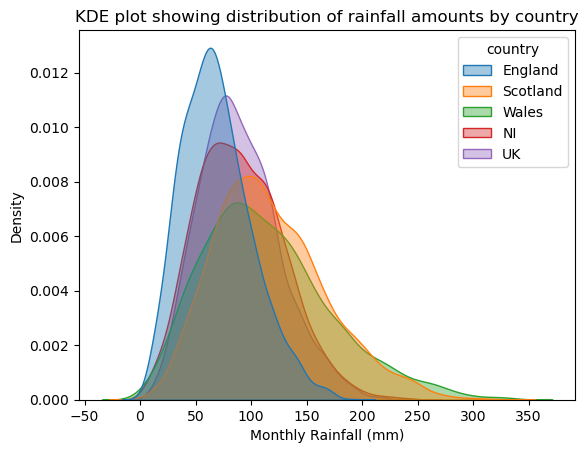

In [33]:
sns.kdeplot(data=ukall, x="rain", hue="country", fill=True, common_norm=False, alpha=0.4, hue_order=['England', 'Scotland', 'Wales','NI','UK'])

plt.title('KDE plot showing distribution of rainfall amounts by country')
plt.xlabel('Monthly Rainfall (mm)');

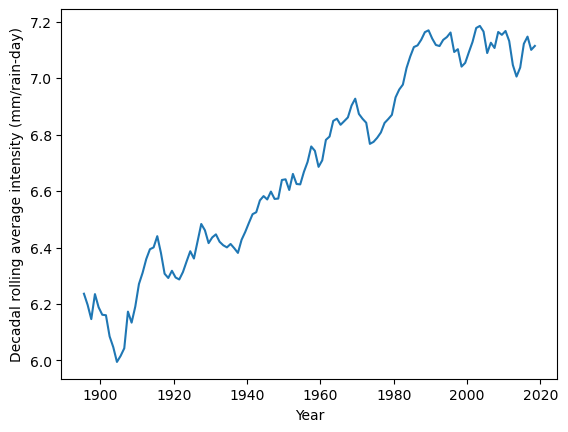

In [34]:
sns.lineplot(data = meanukraindays.rolling(10).mean(),x='year',y='intensity')\
    .set(xlabel='Year', ylabel='Decadal rolling average intensity (mm/rain-day)');
#sns.lineplot(data = meanukraindays.rolling(10).mean(),x='year',y='raindays')\
#    .set(xlabel='Year', ylabel='raindays')
#sns.lineplot(data = test.rolling(10).mean(),x='year',y='rain')\
#    .set(xlabel='Year', ylabel='rain')

In [35]:
# need to normalise the above plots (some commented out) because
# the scales are a bit useless to compare.


In [36]:
meanraindays = meanukraindays['raindays'].mean()
meanintensity = meanukraindays['intensity'].mean()
meanrain = meanukraindays['rain'].mean()

# Or - better still, the following could be more useful to find the mean
# of the first decade and see how it has changed from there:

meanraindays_s = meanukraindays['raindays'].head(9).mean()
meanintensity_s = meanukraindays['intensity'].head(9).mean()
meanrain_s = meanukraindays['rain'].head(9).mean()

meanraindays_s

14.264814814814814

In [37]:
meanukraindays['raindays_norm'] = (meanukraindays['raindays']/meanraindays*100)-100-1.15#-meanraindays_s
meanukraindays['intensity_norm'] = (meanukraindays['intensity']/meanintensity*100)-100+meanintensity_s+0.35
meanukraindays['rain_norm'] = (meanukraindays['rain']/meanrain*100)-100+ meanrain_s
#meanukraindays.head(10)

#I have added some additional little adjustments onto the end just to move them further 
#in line for the starting point. The relative changes remain unaffected but is 
#visually more pleasant.

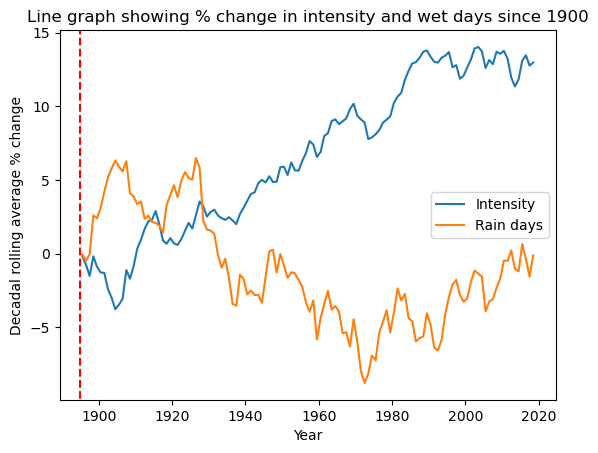

In [38]:
intplt = sns.lineplot(data = meanukraindays.rolling(10).mean(),x='year',y='intensity_norm',label = 'Intensity')\
    .set(xlabel='Year', ylabel='Decadal rolling average % change')
rdplt = sns.lineplot(data = meanukraindays.rolling(10).mean(),x='year',y='raindays_norm',label = 'Rain days')\
    .axvline(x = 1895, ymin = -8, ymax = 13,linestyle = '--', color='red')
plt.legend(loc='best')
plt.title('Line graph showing % change in intensity and wet days since 1900');



In [39]:
#Just a look at the rain totals alone, too:

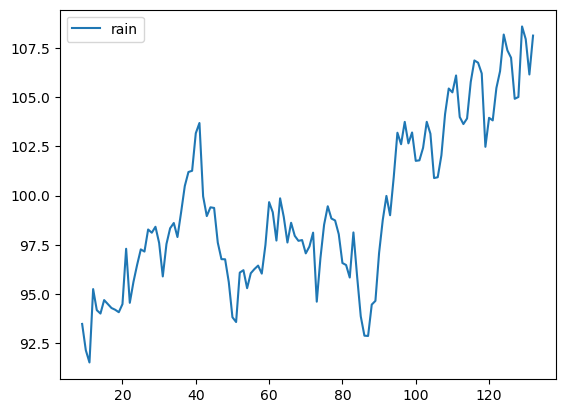

In [40]:
norm_plot = meanukraindays.rolling(10).mean()[['rain']].plot()

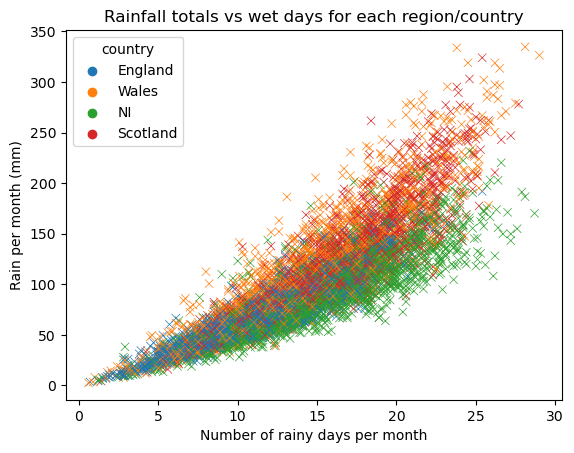

In [41]:
sns.scatterplot(data=ukraindays,x='raindays',y='rain',hue='country',marker='x')
plt.xlabel('Number of rainy days per month')
plt.ylabel('Rain per month (mm)')
plt.title('Rainfall totals vs wet days for each region/country');

In [42]:
# A more obvious correlation between sun hours and rain: 

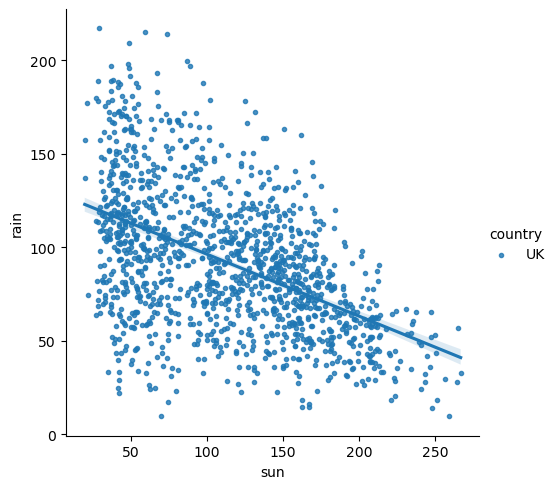

In [43]:
sns.lmplot(data=uk,x='sun',y='rain',hue='country',markers='.');

### Does intensity vary by month?


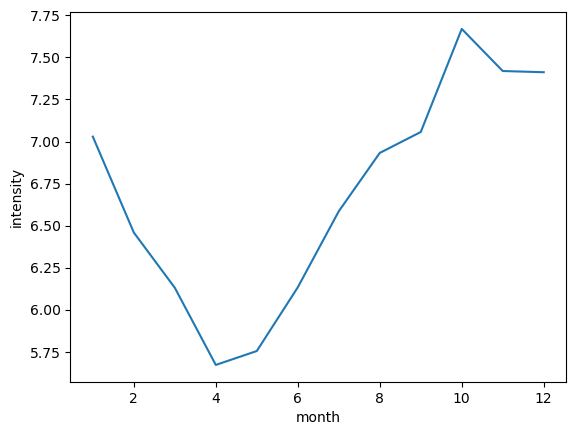

In [44]:
ukrainmonth = ukraindays.drop('country',axis=1).groupby(by=['month']).mean()
sns.lineplot(data = ukrainmonth, x = 'month', y = 'intensity');

## Solar minimums and colder winters

Similarly to El Nino, the 11 year solar cycle can affect global weather patterns with one such expected effect being that we experience cooler winters when the solar cycle is at a minimum. The following is a list of solar minimum dates, with the solar maximums only estimated from these based on the mid points. This should be okay just for an approximation.

In [45]:
solmin = [1890,1902,1913,1923,1933,1944,1954,1964,1976,1986,1996,2008,2019]
solmax = [1896,1908,1918,1928,1939,1949,1959,1970,1981,1991,2002,2014] #estimated

In [46]:
#Picks out years with a solar minimum and puts it in a new column.

def sol(df):
    if df['year'] in solmin:
        return df['mean']
    
uk['solar'] = uk.apply(sol,axis=1)

def solar_max(df):
    if df['year'] in solmax:
        return df['mean']
    
uk['solarmax'] = uk.apply(solar_max,axis=1)


tempmask = uk['max'].notnull()
uk1890 = uk[tempmask]
#uk1890

In [47]:
#Just looking at the first 3 months of the year:

winter = uk1890[uk1890['month'].isin([1, 2, 3])]
wintertemp = winter[['mean','year','month','solar','max','min','solarmax']].groupby(by=['year','month']).mean()
winter_tot = wintertemp.groupby(by='year').sum()/3
winter_tot['year'] = winter_tot.index
#winter_tot['solar'].unique()


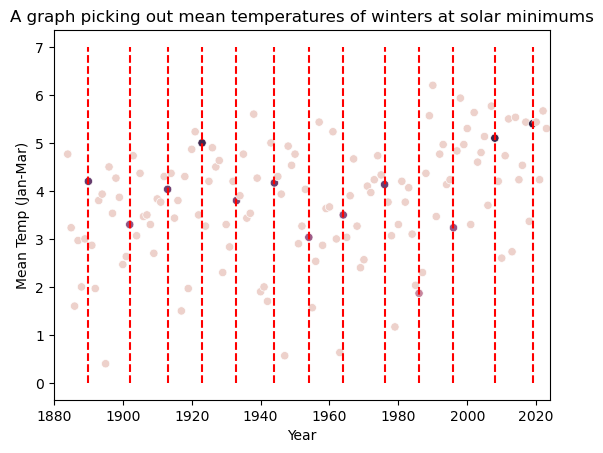

In [48]:
solar_plt = sns.scatterplot(x = 'year', y = 'mean', data = winter_tot,hue ='solar')         
solar_plt.vlines(x = solmin,   # Line on x = 2
           ymin = 0, # Bottom of the plot
           ymax = 7, color='red',linestyle='--') # Top of the plot
solar_plt.legend(title = 'Solar Minimum Years').set_visible(False)
#plt.palette = {'All years': 'cornflowerblue', 'Solar Min': 'fuchsia'}

plt.ylabel('Mean Temp (Jan-Mar)')
plt.xlabel('Year')

solar_plt.set_xlim(1880,2024)
plt.title('A graph picking out mean temperatures of winters at solar minimums');


There is no discernable drop in winter temperatures following solar minima over this period.

In [49]:
ukmaxmin = winter[['year','solar','solarmax']]#.mean()
ukmaxmin[['solar','solarmax']].mean().round(2)

solar       3.91
solarmax    4.21
dtype: float64

Although it can be seen that the mean temperature of winters around the solar maximum is ~0.3C above minimum years. Not really significant though.

In [50]:
#sns.boxplot(data = uk1890, y=[['solar','solarmax']])

## Daylight hours/month


With all of the data points being averaged over a month, it is appropriate to find the average day length of each month - which results in a slightly wonky looking sinusoidal curve. The length of daylight hours in each month can then give more meaning to the average sunshine - as it clearly can't be sunny at night.

In [51]:
#Create dictionary of average length of days in each month to compare to sunshine hours

daylight = {'1':7.62, '2':9.35, '3':11.48, '4':13.80, '5':15.81, '6':16.92, '7':16.44,\
            '8':14.68, '9':12.42,'10': 10.14, '11':8.12, '12':7.08}

In [52]:
for m in range(1,13):
    n = str(m)
    #cx = daylight[n]
    print(daylight[n])

7.62
9.35
11.48
13.8
15.81
16.92
16.44
14.68
12.42
10.14
8.12
7.08


In [53]:
#Function to find the total number of daylight hours each month, including leap years

def dlfun(df):
    for m in range(1,13):
        if df['month'] == m:
            n = str(m)
            
            #for each month, pick out if it has 28, 30 or 31 days to multiply the average length of the day by.
            
            if m == 2:
                dl=28*daylight[n]
                yr = df['year']
                
                # change to 29 days for leap years
                
                if yr%4==0 and yr%100!=0:
                    dl = 29*daylight[n]
                if yr%400==0:
                    dl = 29*daylight[n]
                    return dl
                
            elif m in [1,3,5,7,8,10,12]:
                dl = 31*daylight[n]
            else:
                dl = 30*daylight[n]
            return dl
       

uk['daylight'] = uk.apply(dlfun,axis=1)



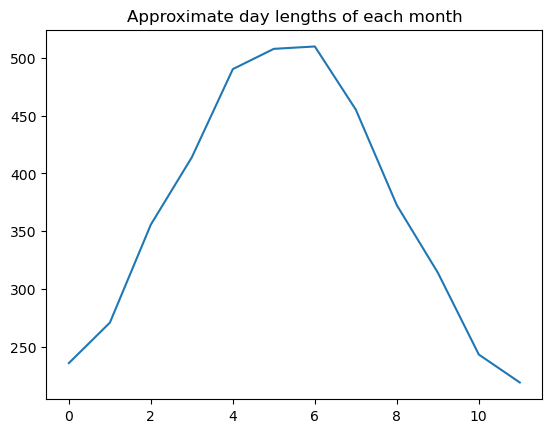

In [54]:
#Lets have a look at the shape of these approximated daylight hours.
uk['daylight'].head(12).plot()
plt.title('Approximate day lengths of each month');

In [55]:
# Add a new column for the amount of sun hours as a percentage of the total available daylight hours.

uk['sunlight'] = uk['sun']/uk['daylight']
uksunlight = uk[uk['sunlight'].notnull()]
uksunlight['sunlight'] = uksunlight['sunlight']*100
uksunlight.head()

year  month   rain  frost   max  mean  min  raindays    sun country  \
888  1910      1  109.1    NaN   5.3   2.5 -0.4      17.1   50.9      UK   
889  1910      2  122.6    NaN   6.8   3.8  0.7      20.6   72.2      UK   
890  1910      3   49.7    NaN   9.0   5.2  1.4       8.2  130.3      UK   
891  1910      4   93.4    NaN   9.8   5.9  2.0      16.2  122.8      UK   
892  1910      5   70.0    NaN  14.3   9.9  5.5      14.8  190.5      UK   

          date  solar  solarmax  daylight   sunlight  
888 1910-01-28    NaN       NaN    236.22  21.547710  
889 1910-02-28    NaN       NaN    261.80  27.578304  
890 1910-03-28    NaN       NaN    355.88  36.613465  
891 1910-04-28    NaN       NaN    414.00  29.661836  
892 1910-05-28    NaN       NaN    490.11  38.868825

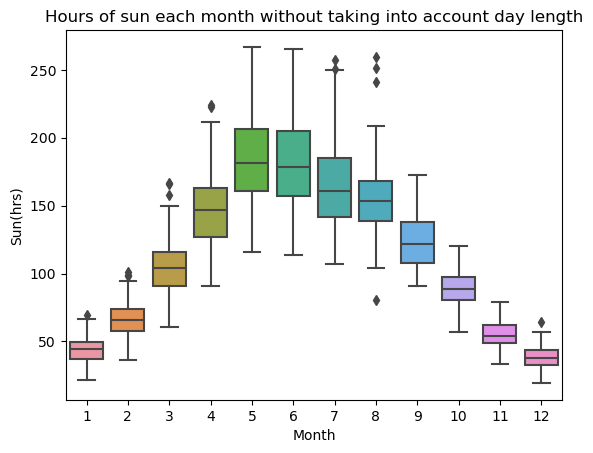

In [56]:
sns.boxplot(data=uksunlight, x = 'month',y='sun')
plt.title('Hours of sun each month without taking into account day length')
plt.ylabel('Sun(hrs)')
plt.xlabel('Month');


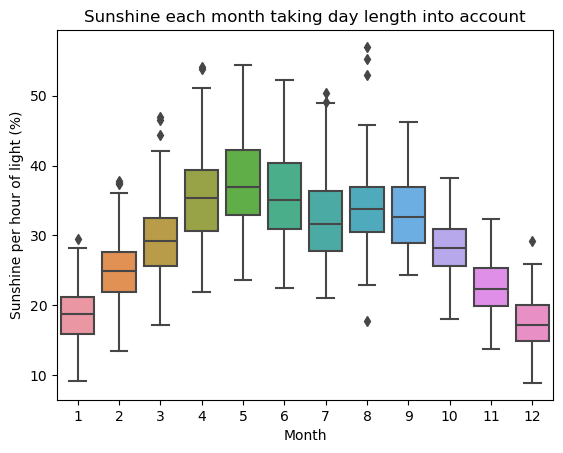

In [57]:
sns.boxplot(data=uksunlight, x = 'month',y='sunlight')
plt.title('Sunshine each month taking day length into account')
plt.ylabel('Sunshine per hour of light (%)')
plt.xlabel('Month');

Showing the percentage of daylight hours where the sun is shining - a better measure of cloud cover per month. We can see that even accounting for the shorter days, there is less nice weather in winter and tat July is also a surprisingly dull month.


<Axes: xlabel='month', ylabel='sunlight'>

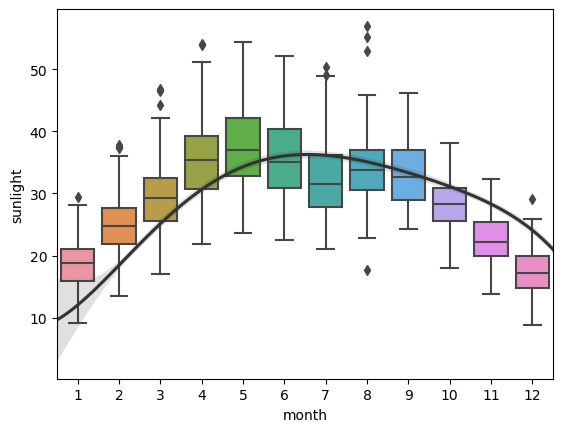

In [58]:
# Just playing around with some extra bits that are pretty meaningless here.
sns.boxplot(
    data=uksunlight, x='month', y='sunlight', zorder=1
)
sns.regplot(
    data=uksunlight, x='month', y='sunlight',
    scatter=False, truncate=False, order=5, color=".2",
)

## Now, what else can we look at?
### Have a look at some correlations:
First filter down to just the years where all the data is available... so that includes frost and begins at 1960:

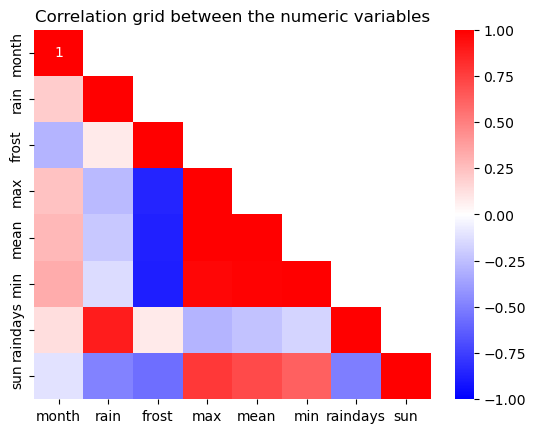

In [59]:
uk60 = ukall[ukall['frost'].notnull()].drop(['country','date','year'],axis=1)
corr = uk60.corr()
#maskymask = np.triu(corr)
maskymask = np.triu(np.ones_like(corr)) 
np.fill_diagonal(maskymask, False)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot = True, vmin=-1, vmax=1,cmap = 'bwr', mask = maskymask)
plt.title('Correlation grid between the numeric variables');

### Some obvious things to see, some that are a little surprising! 

- Frost correlates strongly, negatively with tempterature... of course! Interestingly it also negatively correlates with year, slightly, so I'll have a look at that. Also interesting, although expected, that there is a positive correlation between year and temperature.

- A skew towards warmer, wetter, less frosty months later in the year... a delay in seasonal warmth, expected.

- More rain on rainydays, of course. Less sun with rain, of course. But weird that rain has a tiny correlation with frost, I'd expect this to be negative... same for frost/raindays!

- All temperatures show a strong correlation to sun, and a weak +ve correlation as the year progresses.

- Cooler on wetter days.

- Frost also negatively correlates with sun (sort of interesting... although sun is warmer, nights are usually cooler).

### Why is month correlated with rain (and frost)? 
Turns out it's because of months, obviously, not really being numeric things so this can't be estimated by a linear fit. But it is still interesting to see that it rains more later in the year...

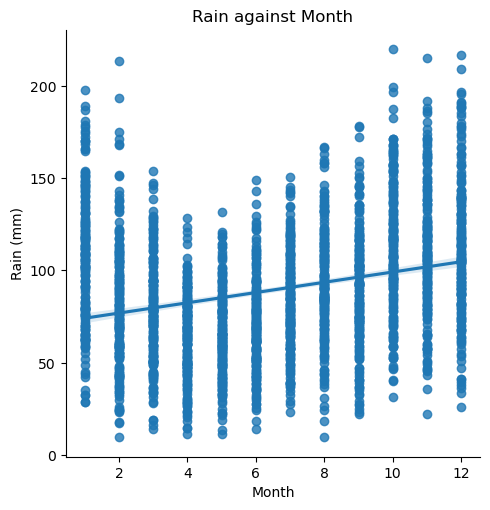

In [60]:
sns.lmplot(data = uk, x='month',y='rain')
plt.title('Rain against Month')
plt.xlabel('Month')
plt.ylabel('Rain (mm)');

### And what about frosts?

In [61]:
ukfrost = uk[uk['frost'].notnull()].drop(['country','date'],axis=1).groupby(by=['year']).sum()[['frost']].reset_index()


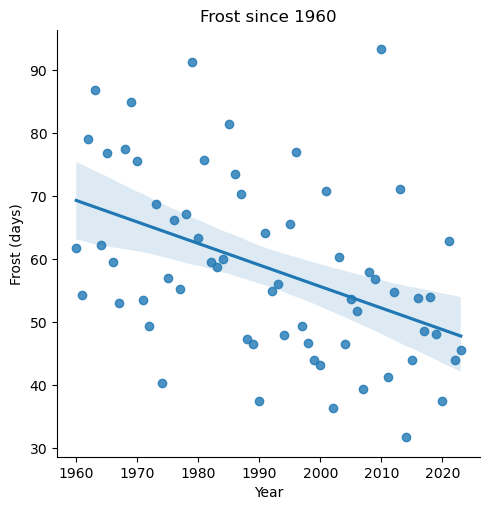

In [62]:
sns.lmplot(data=ukfrost,x='year',y='frost')
plt.title('Frost since 1960')
plt.ylabel('Frost (days)')
plt.xlabel('Year');


## What about if we look back, ignoring frost, from 1890...

In [63]:
uk90 = uk[uk['max'].notnull()].drop(['country','frost'],axis=1)
corr = uk90.corr()

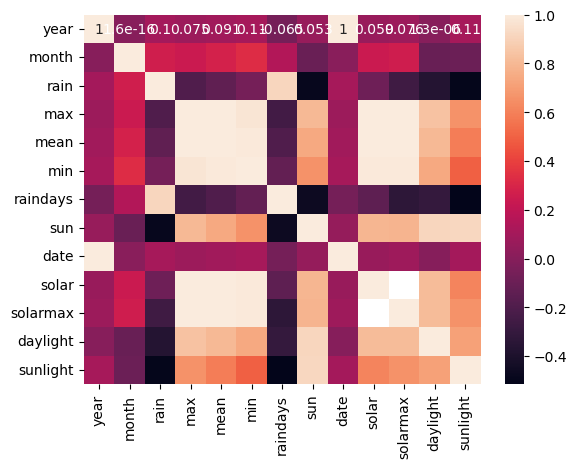

In [64]:
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot = True);

There was quite a lot going on there... maybe worth a look later but nothing jumps out as being different to the 1960 correlations we saw earlier.

### Rain vs Sun
We saw a pretty strong negative correlation between rain and sun, but does this change seasonally? 

It turns out that over the summer months, rain is much more strongly negatively correlated with both total sun hours and sunlight/hour of daylight. During the winter, the amount of sun remains pretty steady no matter how much it rains, but summer months show a significant drop in sunshine with increased rain.

The below plot has 2 tabs, one with sun and one with sunlight/daylight, with each month selectable to make it possible to view different seasons:

In [65]:

uksunlight['month']=uksunlight['month'].astype(str)
months = uksunlight['month'].unique()
index_cmap = factor_cmap('month', palette=['cyan', 'lightgreen', 'yellow', 'orange','chocolate', 'red', 'sandybrown', 'gold', 'greenyellow', 'skyblue', 'slategray', 'blue'], 
                         factors=uksunlight.month.unique())

In [66]:
datemap2 = {'1':'Jan', '2':'Feb', '3':'Mar', '4':'Apr', '5':'May', '6':'Jun', '7':'Jul', '8':'Aug', '9':'Sep', '10':'Oct','11':'Nov','12':'Dec'}

In [97]:
origin_tt = figure(width=700, height=300)
origin_tt.scatter(source=uksunlight, x='rain', y='sun', \
                  fill_color=index_cmap, size=8, \
                  legend_group='month')

show(origin_tt);

In [93]:
# Set up the figure:
p1 = figure(title = "Interactive graph of rain vs sun, rain vs sunlight",height=400, width = 500,x_range=(0, 250))

# Loop over each month as a category and plot that set of data with each colour from the specified palette. Create a legend from the datemap.
for i in months:
    de = uksunlight.loc[(uksunlight.month==i)]
    p1.scatter('rain','sun', source=de, fill_alpha=1, line_color = index_cmap, fill_color=index_cmap, size=10, marker = 'x', legend_label = datemap2[str(de['month'].iloc[0])])
    p1.legend.location = "top_right"
    p1.legend.click_policy="hide"

# Set up the axes and tab title.
p1.xaxis.axis_label = 'Rain (mm)'
p1.yaxis.axis_label = 'Sun (hrs)'
tab1 = TabPanel(child=p1, title="Sun")

# Repeat the above for the second tab:

p2 = figure(title = "Interactive graph of rain vs sun, rain vs sunlight",height=400, width = 500,x_range=(0, 250),y_range=(0,60))
for i in months:
    de = uksunlight.loc[(uksunlight.month==i)]
    p2.scatter('rain','sunlight', source=de, fill_alpha=1, line_color = index_cmap, fill_color=index_cmap, size=10, marker = 'x', legend_label = datemap2[str(de['month'].iloc[0])])
    p2.legend.location = "top_right"
    p2.legend.click_policy="hide"

p2.xaxis.axis_label = 'Rain (mm)'
p2.yaxis.axis_label = 'Sunlight (%)'
tab2 = TabPanel(child=p2, title="Sunlight (%)")

tabs = Tabs(tabs=[ tab1, tab2 ])
#output_file('rainsun.html')
show(tabs)

In [68]:
# p = figure()#plot_width=600, plot_height=450, title = 'Rain vs Sun')
# p.scatter('rain','sun', c='month',source=uksunlight,fill_alpha=0.2, size=1, fill_color=index_cmap,legend_label='month')
# p.xaxis.axis_label = 'Sun'
# p.yaxis.axis_label = 'Rain'
# p.legend.location = "top_left"

# show(p)

### Below is an example of the same plot that I was working from with Seaborn, before I thought Bokeh would be more useful.

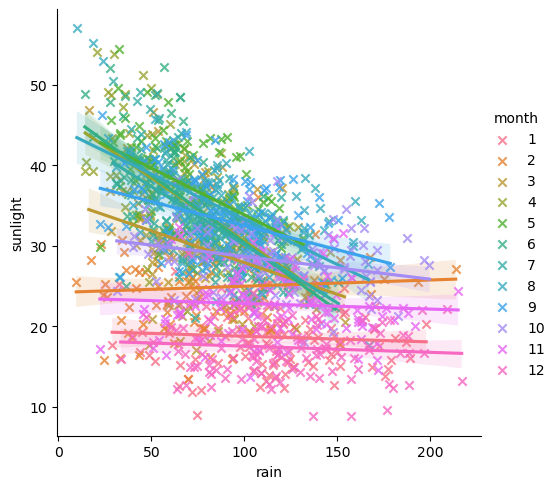

In [69]:
sns.lmplot(data=uksunlight,x='rain',y='sunlight',hue='month', markers='x');

## Looking at rainfall on a decadel level:

In [70]:
#Group all the dats into decades

uk_rain_dec = uk[['rain','year','month']].groupby((uk.year//10)*10).mean().drop('month',axis=1)
uk_rain_dec

rain    year
year                    
1830   84.031250  1837.5
1840   83.230000  1844.5
1850   79.255833  1854.5
1860   88.694167  1864.5
1870   91.155000  1874.5
1880   85.965000  1884.5
1890   84.658333  1894.5
1900   85.993333  1904.5
1910   90.410833  1914.5
1920   92.019167  1924.5
1930   89.180833  1934.5
1940   87.275000  1944.5
1950   89.254167  1954.5
1960   90.352500  1964.5
1970   86.537500  1974.5
1980   94.112500  1984.5
1990   95.142500  1994.5
2000   98.004167  2004.5
2010   96.498333  2014.5
2020  100.381250  2021.5

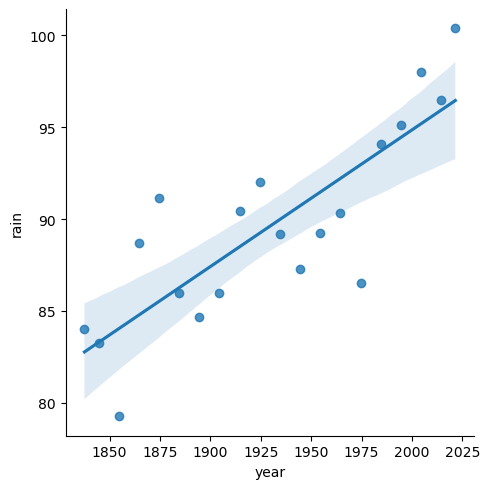

In [71]:
sns.lmplot(data=uk_rain_dec,x='year',y='rain');

In [72]:
#Now what if we group them monthly, averaging over the decades?

uk_rain_dec2 = uk[['rain','year','month']].groupby([(uk.year//10)*10,'month']).mean().drop('year',axis=1)\
                        .reset_index('month')

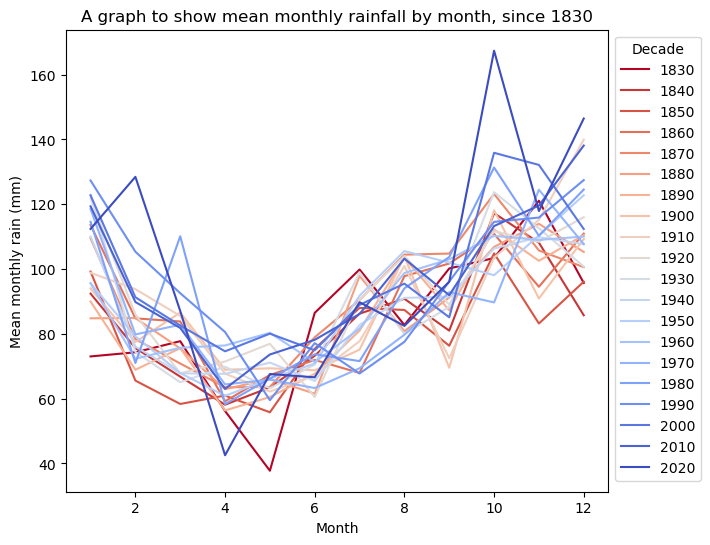

In [73]:
plt.figure(figsize=[7,6])
raindec = sns.lineplot(data=uk_rain_dec2,x='month',y='rain',hue='year',palette= 'coolwarm_r',legend='full')
#raindec.set_xticklabels(['Jan', 'Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.setp(raindec.get_legend().get_texts(), fontsize='7') # for legend text
plt.legend(title='Decade') 
plt.ylabel('Mean monthly rain (mm)')
plt.xlabel('Month')
sns.move_legend(raindec, "upper left", bbox_to_anchor=(1, 1))
plt.title('A graph to show mean monthly rainfall by month, since 1830');

The blues are evidence that over winter at least, we have more rain than we used to.

## Top 10 lists

In [74]:
uknum = uk.drop(['country','solar','daylight','sunlight','date'],axis=1)
hottestyears = uknum.groupby(by=['year']).mean().sort_values(by='mean',ascending=False).head(10).reset_index()
hottestyears.index += 1
hottestyears['Year'] = hottestyears['year']
hottestyears['Temperature (C)'] = hottestyears['mean'].round(2)
hottestyears[['Year','Temperature (C)']]

Year  Temperature (C)
1   2022            10.00
2   2023             9.95
3   2014             9.86
4   2006             9.66
5   2011             9.61
6   2020             9.59
7   2007             9.52
8   2017             9.49
9   2003             9.43
10  2004             9.42

### Just checked and this is true! 10 hottest years all occured since 2003!

What about wettest years? Is this useful?

In [75]:
uknum = uk.drop(['country','solar','daylight','sunlight','date'],axis=1)
wettestyears = uknum.groupby(by=['year']).mean().sort_values(by='rain',ascending=False).head(10).reset_index()
wettestyears.index += 1
wettestyears[['year']]

year
1   1872
2   2000
3   1903
4   2020
5   2012
6   1877
7   1998
8   1954
9   2008
10  2014

In [76]:
ukrain = ukall.copy()[['rain','country']]


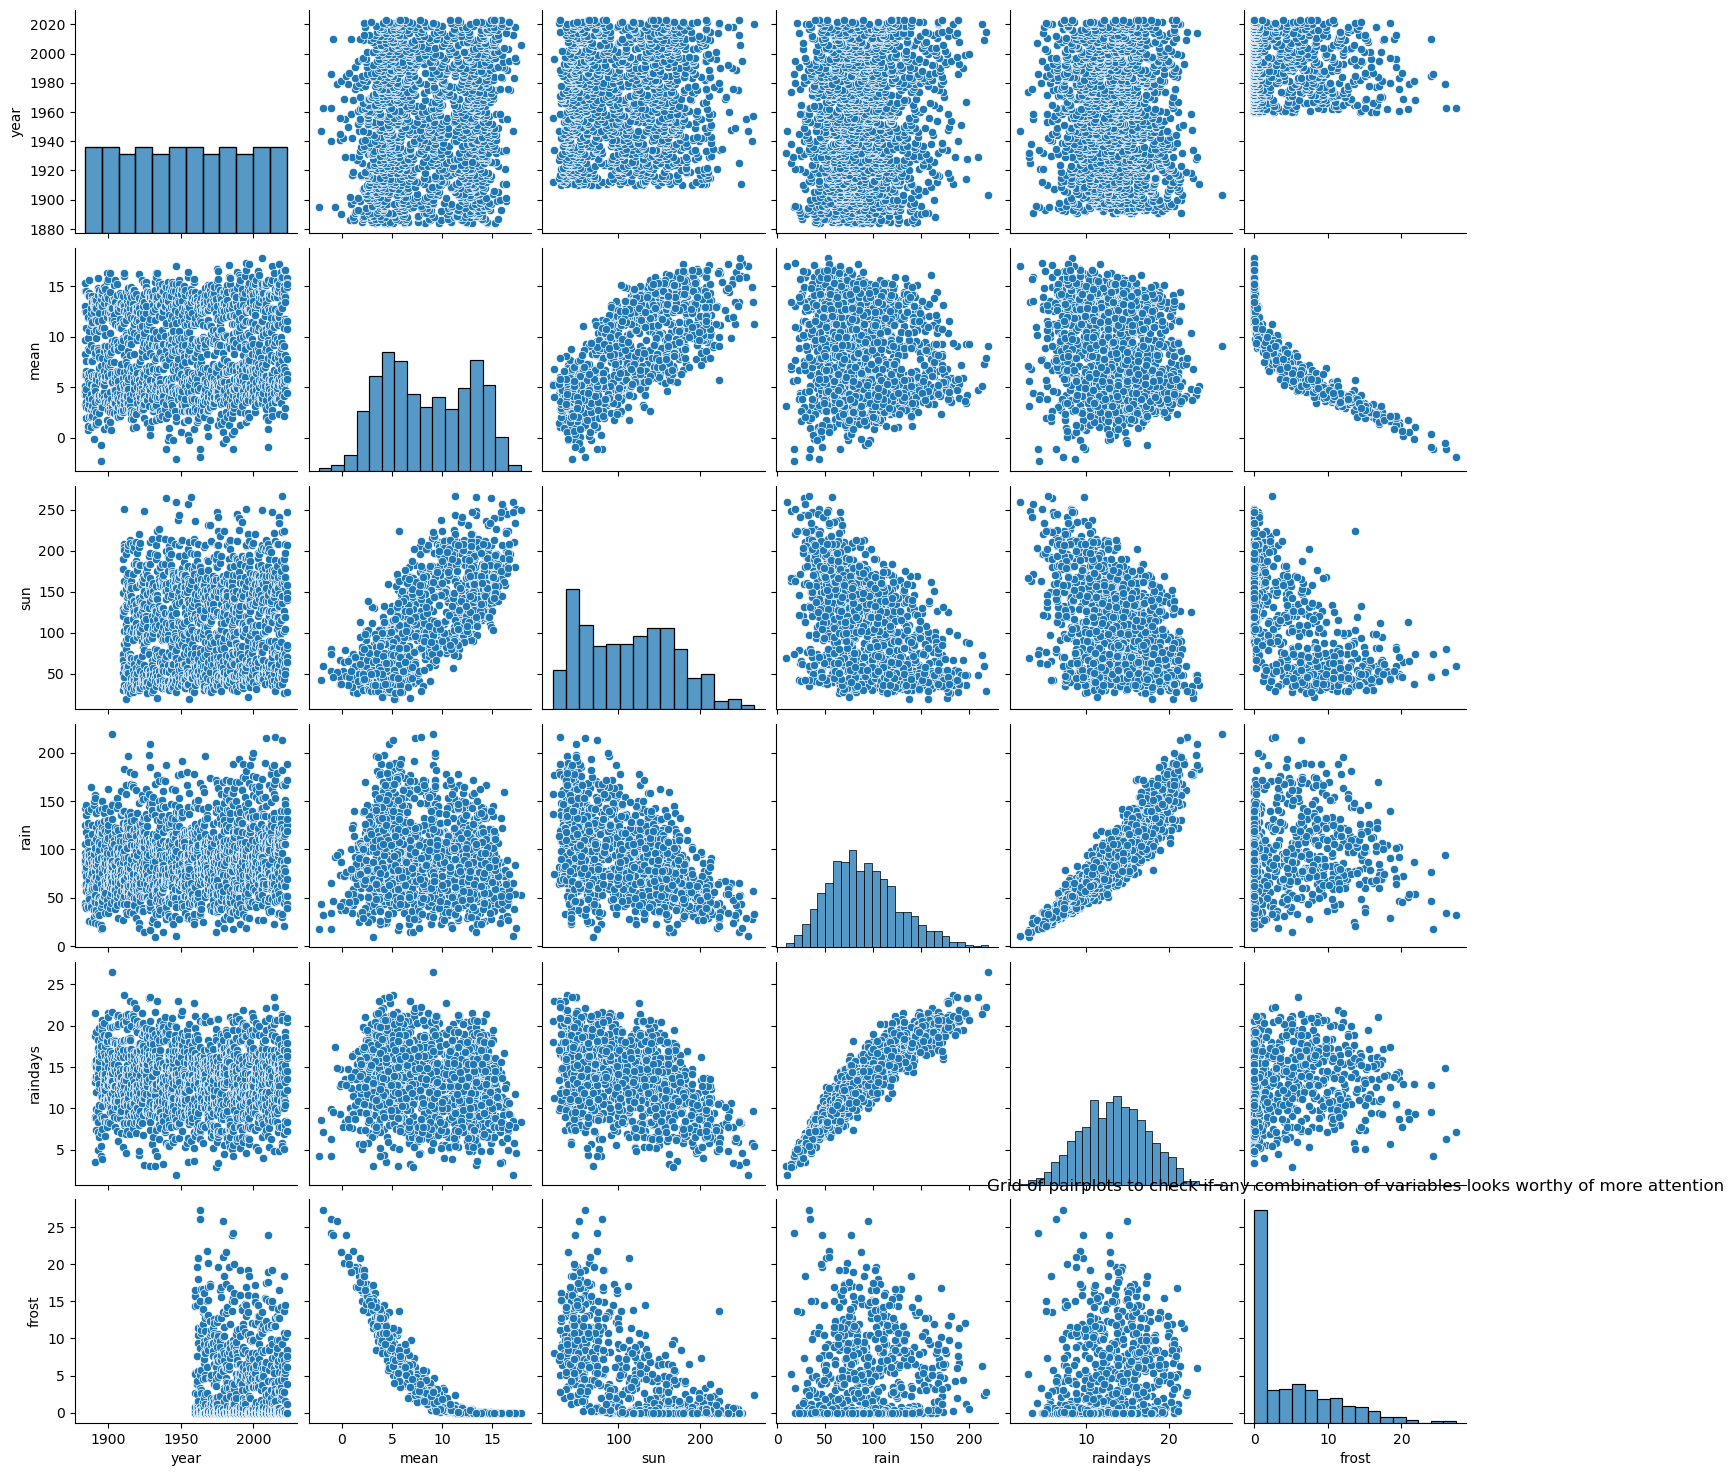

In [98]:
# Commented out as it's slow to load... but here's a beautiful set of pairplots...

sns.pairplot(data=uk1890,vars=['year','mean','sun','rain','raindays','frost'])
plt.title('Grid of pairplots to check if any combination of variables looks worthy of more attention');

## Have a look at monthly trends for the UK

In [99]:
# Drop the non-numeric columns:
ukf = uk.drop(['date','country','solar','solarmax'], axis=1)
ukf2 = ukf.groupby(by=['month']).mean().reset_index()
ukf2.head()

month    year        rain      frost        max       mean       min  \
0      1  1929.5  106.648404  12.445312   5.881429   3.197857  0.535000   
1      2  1929.5   81.685106  11.721875   6.287143   3.342143  0.416429   
2      3  1929.5   77.816489   8.800000   8.360714   4.854286  1.364286   
3      4  1929.5   65.117021   5.014062  11.140714   7.027857  2.930714   
4      5  1929.5   66.669681   1.235937  14.500714  10.002143  5.601429   

    raindays         sun    daylight  sunlight  
0  15.519549   44.141228  236.220000  0.186865  
1  12.567669   65.696491  264.087766  0.248765  
2  12.957143  104.922807  355.880000  0.294826  
3  11.798496  147.638596  414.000000  0.356615  
4  11.805263  183.250877  490.110000  0.373897

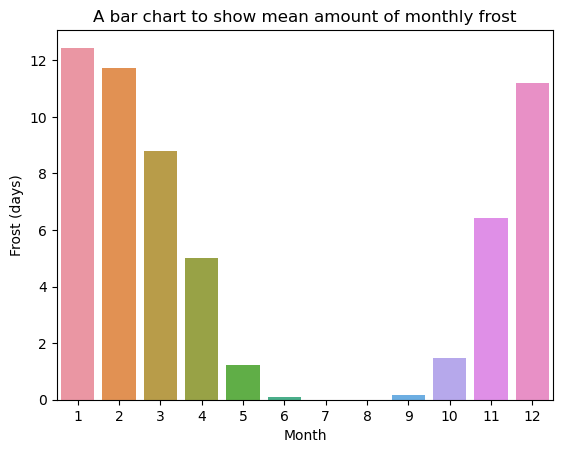

In [100]:
sns.barplot(data = ukf2, x='month',y='frost')#,hue='month')
plt.title('A bar chart to show mean amount of monthly frost')
plt.xlabel('Month')
plt.ylabel('Frost (days)');

In [80]:
#Started out looking at number of frosts in June, hence variable name
# but ended up exploring, the month now is 8 (August)...

junfrost = uk[uk['month'] == 8][['frost','year']]
frostmsk = junfrost['frost']>0
junfrost[frostmsk].groupby(by = 'year').mean()

frost
year       
1964    0.1
1973    0.1
1977    0.1
1999    0.1

## Storms:
### What with this year being the 2nd most named storms on record... so far...
It has been in the news that this year is probably going to break the record for the number of named storms, with the previous most stormy season (records only begain in 2015) being 2015/16. A quick look at the rainfall to see if this agrees with my data:

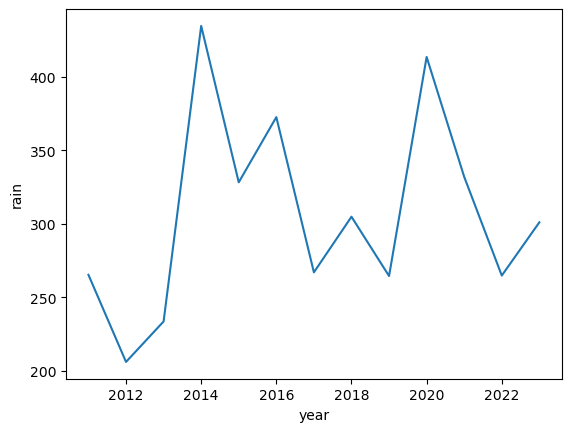

In [81]:
uk2000 = uk[uk['year']>2010].drop(['max','min','mean','country','date','sun','frost','solar','solarmax','daylight','sunlight'],axis=1)
uk2000w = uk2000[uk2000['month'].isin([1,2,3])].groupby(by='year').sum().reset_index()
sns.lineplot(data=uk2000w,x='year',y='rain');


In [82]:
# Not particularly, although it is one of the wetter years. If I plot the rolling wetness
# with the annual number of storms overlaid - then do we see any patter?

In [83]:
# Set up a new thing with the number of storms per year...
storms = {'year': [2015, 2016,2017,2018,2019,2020,2021,2022,2023], 'count': [11,5,8,8,6,5,6,2,10]}
stormsdf = pd.DataFrame(data=storms)

#Put the total number in the middle of each year for plotting purposes, to match what comes with the rolling average next
stormsdf['date'] = pd.to_datetime(dict(year=stormsdf.year, month=6, day=28))
stormsdf.sort_values(by='date', inplace = True) 
stormsdf = stormsdf.reset_index().drop(['index'], axis=1)

# Normalise the scale so as to be more easily comparable to rain data
rangestorms = stormsdf['count'].max() - stormsdf['count'].min()
stormsdf['count'] = (stormsdf['count']- stormsdf['count'].min())/rangestorms 


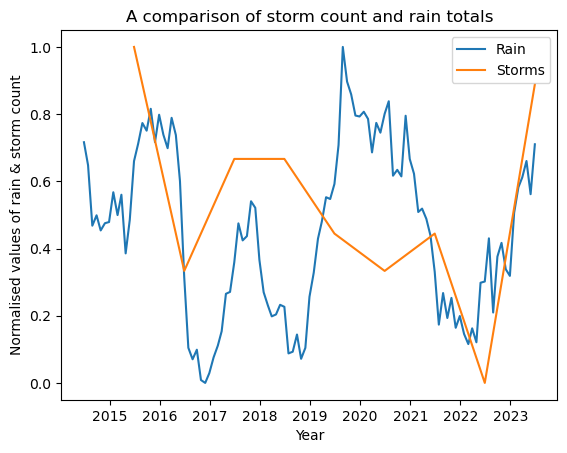

In [84]:
from pandas.tseries.offsets import DateOffset

# Choose the period over which to have a rolling average, and an offset to reset the date that this will be plotted.
window = 12
offset = int(window/2)

# uk2012, later changed to only have >2013, but who cares...
# Find the rolling averages after grouping, then undo grouping...
uk2012 = uk[uk['year']>2013].drop(['max','min','mean','country','date','sun','frost','solar','solarmax','daylight','sunlight']\
                                  ,axis=1).groupby(by=['year','month']).mean()#.reset_index('month')
uk2012 = uk2012.rolling(window).mean().reset_index()

# Set a date column.
uk2012['date'] = pd.to_datetime(dict(year=uk2012.year, month=uk2012.month, day=28))
uk2012.sort_values(by='date', inplace = True) 
uk2012 = uk2012.reset_index().drop(['index'], axis=1)

#Shift the dates back so that the rolling average is centered around the correct point.
uk2012['date'] = uk2012['date'] - DateOffset(months=offset)

# Normalise to compare to the storm data.
rangerain = uk2012['rain'].max()-uk2012['rain'].min()
uk2012['rain'] = (uk2012['rain'] - uk2012['rain'].min())/rangerain

sns.lineplot(data = uk2012,x='date',y='rain',label = 'Rain')
sns.lineplot(data = stormsdf,x='date',y='count',label = 'Storms');
plt.ylabel('Normalised values of rain & storm count')
plt.xlabel('Year')
plt.title('A comparison of storm count and rain totals')
plt.legend();

# Much larger dataset of temperatures, daily from 1772?

In [85]:
#HADley Central Englant Timeseries is a much longer set - but complex to download them all and way too large for now.

hc = pd.read_csv('data/weather/hadcet.csv')
hc.head()

Date  hmean  hmax  hmin
0  1772-01-01    3.2   NaN   NaN
1  1772-01-02    2.0   NaN   NaN
2  1772-01-03    2.7   NaN   NaN
3  1772-01-04    2.7   NaN   NaN
4  1772-01-05    1.5   NaN   NaN

In [86]:
hc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92064 entries, 0 to 92063
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    92064 non-null  object 
 1   hmean   92064 non-null  float64
 2   hmax    53348 non-null  float64
 3   hmin    53348 non-null  float64
dtypes: float64(3), object(1)
memory usage: 2.8+ MB


In [87]:
hc['date'] = pd.to_datetime(hc['Date'],format='mixed')
hc['year'] = hc['date'].dt.year
hc['month'] = hc['date'].dt.month
hc.head(4)

Date  hmean  hmax  hmin       date  year  month
0  1772-01-01    3.2   NaN   NaN 1772-01-01  1772      1
1  1772-01-02    2.0   NaN   NaN 1772-01-02  1772      1
2  1772-01-03    2.7   NaN   NaN 1772-01-03  1772      1
3  1772-01-04    2.7   NaN   NaN 1772-01-04  1772      1

In [88]:
#ABORTED THIS PLAN. WAY TOO BIG AND SLOW.

#sns.scatterplot(data = hc, x ='Date',y='hmean')

## Have the max-min range of temperatures, monthly or anually changed?

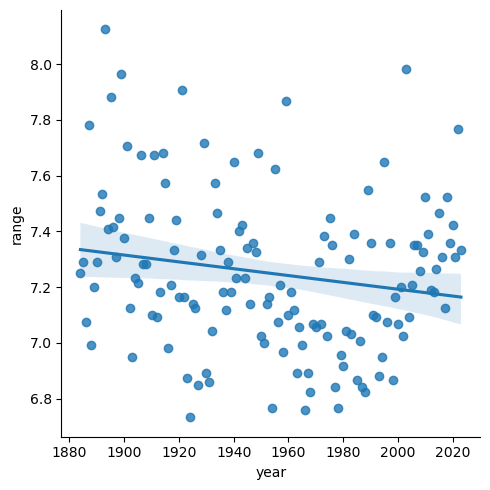

In [89]:
# See if the range of temperatures (max-min) each month has changed over the century

ukrange = uk[uk['max'].notnull()][['year','month','max','min']].copy()
ukrange['range'] = uk['max']-uk['min']
ukrange = ukrange.groupby('year').mean().reset_index()
ukrange


sns.lmplot(data=ukrange,x='year',y='range');

# If anything, it looks like the range of temperatures has actually decreased!

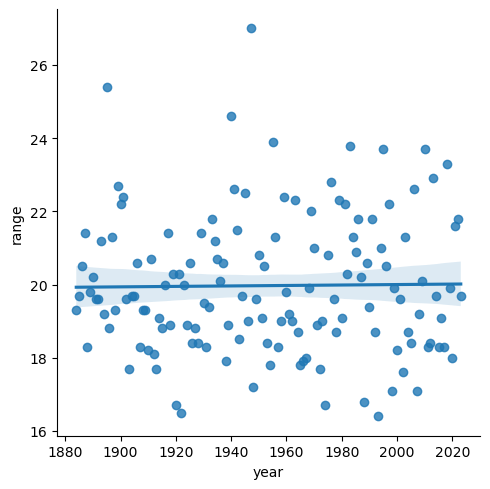

In [90]:
ukrange = uk[uk['max'].notnull()][['year','month','max','min']].copy()
ukmax = ukrange.groupby(by='year').max()
ukmin = ukrange.groupby(by='year').min()[['min']]
ukrange = pd.merge(ukmax, ukmin, on='year').drop('min_x',axis=1)
ukrange['range']=ukrange['max']-ukrange['min_y']
ukrange = ukrange.reset_index()
ukrange
sns.lmplot(data=ukrange,x='year',y='range')


In [91]:
# On both counts, it would seem there is no change in max-min temp range over the last century

## Can we pick out the months where both sun and rain totals are high? Ah they summer? - has this been done in the rainbow graph just up?

### Also can we see if rain is more intense in some months?

In [92]:
# Some very large spatial files to use, but not for this computer either...


# import netCDF4 as nc
# import xarray as xr

# ds = xr.open_dataset('data/nctest.nc')
# df = ds.to_dataframe()

